In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
loaded_model = tf.keras.models.load_model("saved_model/2RobustCNNLSTM")
# loaded_model = tf.keras.models.load_model("RavdessCNNLSTM")


In [3]:
layer_index = 0  # replace this with the index of the layer you want to inspect

# create a new model that outputs the output of the selected layer
layer_outputs = [layer.output for layer in loaded_model.layers]
convolution_model_layer0 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[0])
convolution_model_layer1 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[4])
convolution_model_layer2 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[8])
convolution_model_layer3 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[12])


# test_data_value = np.load('saved_dataset/40_2048_512_test_data_value.npy')
# test_data_target = np.load('saved_dataset/40_2048_512_test_data_target.npy')


In [4]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 154, 38, 64)       640       
                                                                 
 batch_normalization (BatchN  (None, 154, 38, 64)      256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 154, 38, 64)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 77, 19, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 17, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 17, 64)       2

In [40]:
test_data_value = np.load('saved_dataset/crema_d_f32_test_data_value.npy')
test_data_target = np.load('saved_dataset/crema_d_f32_test_data_target.npy')
# test_data_value = np.load('saved_dataset/ravdess_test.npy')
# test_data_target = np.load('saved_dataset/ravdess_test_target.npy')

In [6]:
test_data_value[0].shape

(228, 40)

In [43]:
# Crema-D
input_data = np.reshape(test_data_value[0], (1, 156, 40))

# Ravdess
# input_data = np.reshape(test_data_value[0], (1, 228, 40))



In [44]:
test_data_target[0]

1

In [45]:
layer_output0 = convolution_model_layer0.predict(input_data)
layer_output1 = convolution_model_layer1.predict(input_data)
layer_output2 = convolution_model_layer2.predict(input_data)
layer_output3 = convolution_model_layer3.predict(input_data)


1/1 [==============================] - 0s 111ms/step


In [46]:
print(layer_output0.shape)
print(layer_output1.shape)
print(layer_output2.shape)
print(layer_output3.shape)

(1, 154, 38, 64)
(1, 75, 17, 64)
(1, 37, 8, 128)
(1, 18, 3, 128)


In [47]:
squeezed_output0 = layer_output0.squeeze()
squeezed_output1 = layer_output1.squeeze()
squeezed_output2 = layer_output2.squeeze()
squeezed_output3 = layer_output3.squeeze()

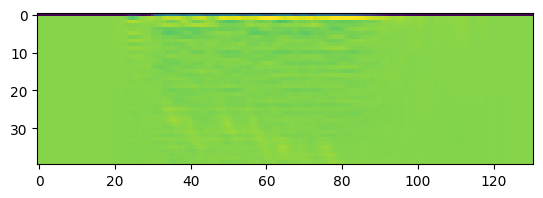

In [13]:
test_data_value[0].shape
plt.imshow(test_data_value[0][97:].T)

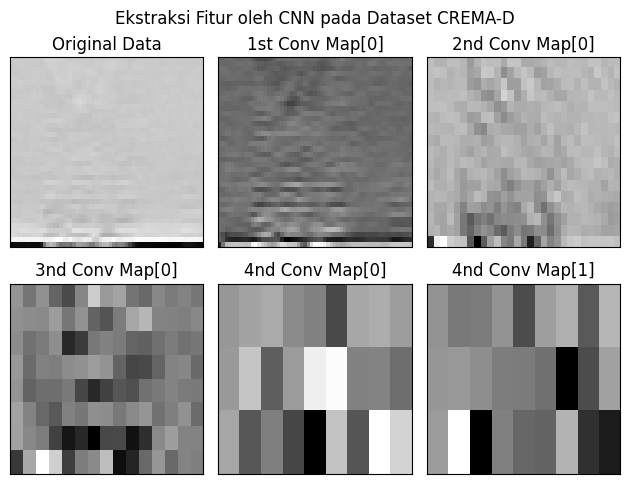

In [50]:
import librosa
originalData = test_data_value[0][97:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
axs[0, 0].set_title('Original Data')
# librosa.display.specshow(originalData.T, ax=axs[0, 0])
axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

axs[0, 1].set_title(f'1st Conv Map[0]')
axs[0, 1].imshow(layer_output0[0, 95:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 2].set_title(f'2nd Conv Map[0]')
axs[0, 2].imshow(layer_output1[0, 46:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'3nd Conv Map[0]')
axs[1, 0].imshow(layer_output2[0, 22:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 1].set_title(f'4nd Conv Map[0]')
axs[1, 1].imshow(layer_output3[0, 9:, :, 125].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 2].set_title(f'4nd Conv Map[1]')
axs[1, 2].imshow(layer_output3[0, 9:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur oleh CNN pada Dataset CREMA-D", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

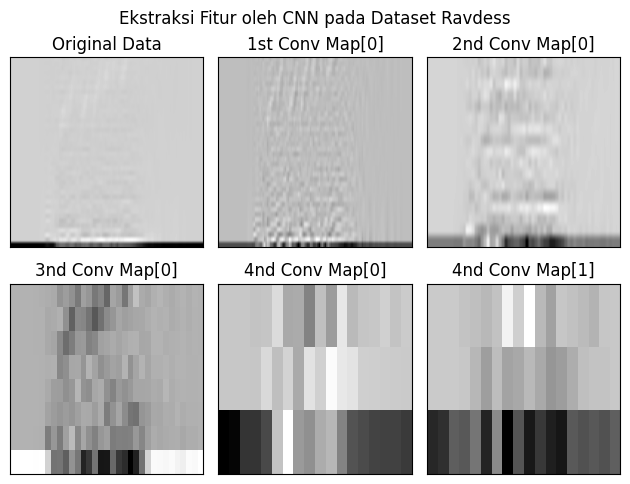

In [37]:
import librosa
originalData = test_data_value[0][97:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
axs[0, 0].set_title('Original Data')
# librosa.display.specshow(originalData.T, ax=axs[0, 0])
axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

axs[0, 1].set_title(f'1st Conv Map[0]')
axs[0, 1].imshow(layer_output0[0, 95:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 2].set_title(f'2nd Conv Map[0]')
axs[0, 2].imshow(layer_output1[0, 46:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'3nd Conv Map[0]')
axs[1, 0].imshow(layer_output2[0, 22:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 1].set_title(f'4nd Conv Map[0]')
axs[1, 1].imshow(layer_output3[0, 9:, :, 125].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 2].set_title(f'4nd Conv Map[1]')
axs[1, 2].imshow(layer_output3[0, 9:, :, 127].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur oleh CNN pada Dataset Ravdess", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

In [184]:
layer_output3.shape

(1, 18, 3, 128)

In [ ]:
import librosa
originalData = test_data_value[0][97:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
axs[0, 0].set_title('Original Data')
# librosa.display.specshow(originalData.T, ax=axs[0, 0])
axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

axs[0, 1].set_title(f'1st Conv Map[0]')
axs[0, 1].imshow(layer_output0[0, 95:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 2].set_title(f'2nd Conv Map[0]')
axs[0, 2].imshow(layer_output1[0, 46:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'3nd Conv Map[0]')
axs[1, 0].imshow(layer_output2[0, 22:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 1].set_title(f'4nd Conv Map[0]')
axs[1, 1].imshow(layer_output3[0, 9:, :, 125].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 2].set_title(f'4nd Conv Map[1]')
axs[1, 2].imshow(layer_output3[0, 9:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur oleh CNN pada Dataset CREMA-D", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

In [22]:
# SAVEE
loaded_model = tf.keras.models.load_model("checkpoints/saveeSavedModel3")
# loaded_model = tf.keras.models.load_model("RavdessCNNLSTM")

test_data_value = np.load('saved_dataset/saveeFix/standardSR_savee_test.npy')
test_data_target = np.load(
    'saved_dataset/saveeFix/standardSR_savee_test_target.npy')
input_data = np.reshape(test_data_value[0], (1, 308, 40))

layer_outputs = [layer.output for layer in loaded_model.layers]
convolution_model_layer0 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[0])
convolution_model_layer0_1 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[1])
convolution_model_layer0_2 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[2])
convolution_model_layer0_3 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[3])
convolution_model_layer0_4 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[4])


convolution_model_layer1 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[4])
convolution_model_layer2 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[8])
convolution_model_layer3 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[12])

batch_normalization_layer0 = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[5])
bnlast = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[13])
activationlast = tf.keras.models.Model(inputs=loaded_model.input, outputs=layer_outputs[14])


layer_output0 = convolution_model_layer0.predict(input_data)
layer_output1 = convolution_model_layer1.predict(input_data)
layer_output2 = convolution_model_layer2.predict(input_data)
layer_output3 = convolution_model_layer3.predict(input_data)

layer_output0_1 = convolution_model_layer0_1.predict(input_data)
layer_output0_2 = convolution_model_layer0_2.predict(input_data)
layer_output0_3 = convolution_model_layer0_3.predict(input_data)
layer_output0_4 = convolution_model_layer0_4.predict(input_data)



layer_output4= batch_normalization_layer0.predict(input_data)
layer_output5= bnlast.predict(input_data)
layer_output6= activationlast.predict(input_data)




1/1 [==============================] - 0s 97ms/step


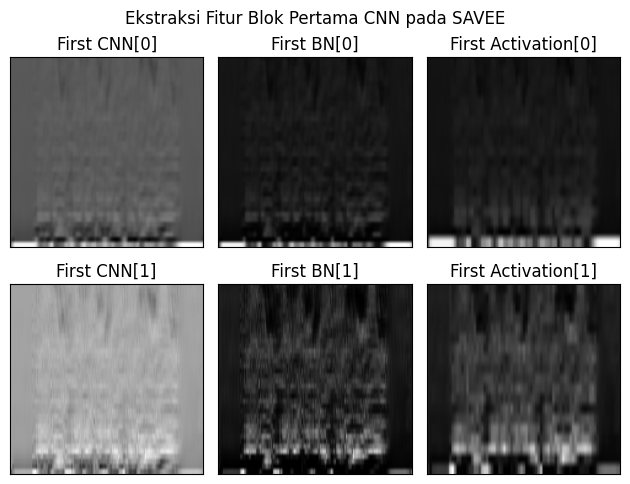

In [29]:
import librosa
originalData = test_data_value[0][160:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
# axs[0, 0].set_title('Original Data')
# # librosa.display.specshow(originalData.T, ax=axs[0, 0])
# axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

# axs[0, 1].set_title(f'1st Conv Map[0]')
# axs[0, 1].imshow(layer_output0[0, 148:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

# axs[0, 2].set_title(f'2nd Conv Map[0]')
# axs[0, 2].imshow(layer_output1[0, 72:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 0].set_title(f'3nd Conv Map[0]')
# axs[1, 0].imshow(layer_output2[0, 35:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 1].set_title(f'4nd Conv Map[0]')
# axs[1, 1].imshow(layer_output3[0, 16:, :, 3].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 2].set_title(f'4nd Conv Map[1]')
# axs[1, 2].imshow(layer_output3[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 0].set_title(f'First CNN[0]')
axs[0, 0].imshow(layer_output0_1[0, 148:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 1].set_title(f'First BN[0]')
axs[0, 1].imshow(layer_output0_2[0, 148:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')
# axs[0, 1].set_title(f'First BN[0]')
# axs[0, 1].imshow(layer_output0_4[0, 30:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 2].set_title(f'First Activation[0]')
axs[0, 2].imshow(layer_output0_3[0, 74:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'First CNN[1]')
axs[1, 0].imshow(layer_output0_1[0, 148:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[1, 1].set_title(f'First BN[1]')
axs[1, 1].imshow(layer_output0_2[0, 148:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[1, 2].set_title(f'First Activation[1]')
axs[1, 2].imshow(layer_output0_3[0, 74:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur Blok Pertama CNN pada SAVEE", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

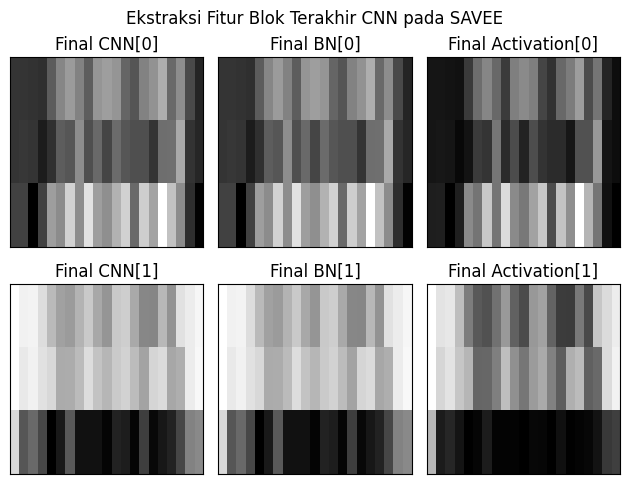

In [16]:
import librosa
originalData = test_data_value[0][160:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
# axs[0, 0].set_title('Original Data')
# # librosa.display.specshow(originalData.T, ax=axs[0, 0])
# axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

# axs[0, 1].set_title(f'1st Conv Map[0]')
# axs[0, 1].imshow(layer_output0[0, 148:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

# axs[0, 2].set_title(f'2nd Conv Map[0]')
# axs[0, 2].imshow(layer_output1[0, 72:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 0].set_title(f'3nd Conv Map[0]')
# axs[1, 0].imshow(layer_output2[0, 35:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 1].set_title(f'4nd Conv Map[0]')
# axs[1, 1].imshow(layer_output3[0, 16:, :, 3].T,origin='lower', cmap='gray', aspect='auto')

# axs[1, 2].set_title(f'4nd Conv Map[1]')
# axs[1, 2].imshow(layer_output3[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 0].set_title(f'Final CNN[0]')
axs[0, 0].imshow(layer_output3[0, 16:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 1].set_title(f'Final BN[0]')
axs[0, 1].imshow(layer_output5[0, 16:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')
axs[0, 2].set_title(f'Final Activation[0]')
axs[0, 2].imshow(layer_output6[0, 16:, 0:, 3].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'Final CNN[1]')
axs[1, 0].imshow(layer_output3[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[1, 1].set_title(f'Final BN[1]')
axs[1, 1].imshow(layer_output5[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')
axs[1, 2].set_title(f'Final Activation[1]')
axs[1, 2].imshow(layer_output6[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur Blok Terakhir CNN pada SAVEE", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

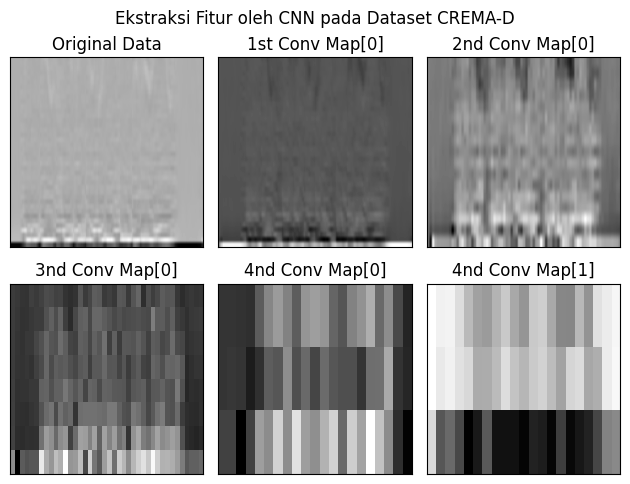

In [47]:
import librosa
originalData = test_data_value[0][160:, :40]
# librosa.display.specshow(originalData.T)
# plt.xlabel("Time")
# plt.ylabel("MFCC")
# plt.colorbar()
fig, axs = plt.subplots(nrows=2, ncols=3)
axs[0, 0].set_title('Original Data')
# librosa.display.specshow(originalData.T, ax=axs[0, 0])
axs[0, 0].imshow(originalData.T,origin='lower', cmap='gray', aspect='auto')

axs[0, 1].set_title(f'1st Conv Map[0]')
axs[0, 1].imshow(layer_output0[0, 148:, :, 1].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 2].set_title(f'2nd Conv Map[0]')
axs[0, 2].imshow(layer_output1[0, 72:, :, 2].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 0].set_title(f'3nd Conv Map[0]')
axs[1, 0].imshow(layer_output2[0, 35:, :, 0].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 1].set_title(f'4nd Conv Map[0]')
axs[1, 1].imshow(layer_output3[0, 16:, :, 3].T,origin='lower', cmap='gray', aspect='auto')

axs[1, 2].set_title(f'4nd Conv Map[1]')
axs[1, 2].imshow(layer_output3[0, 16:, 0:, 8].T,origin='lower', cmap='gray', aspect='auto')

axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])
# plt.delaxes(axs[1, 2])
fig.tight_layout()
fig.suptitle("Ekstraksi Fitur oleh CNN pada Dataset CREMA-D", y=1)
fig.subplots_adjust(top=0.90)

plt.show()

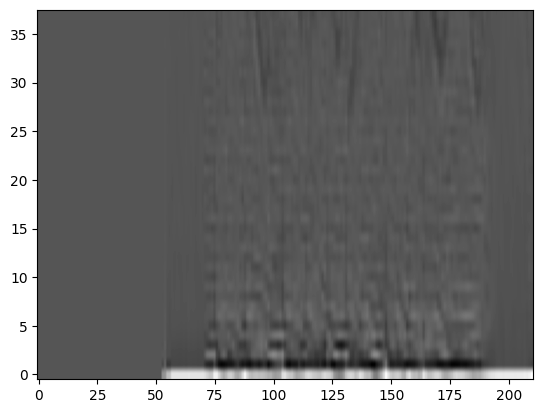

In [13]:
# Choose a random feature map to visualize
feature_map_idx = 4

# Get the feature map tensor
feature_map = layer_output0[0, 95:, :, feature_map_idx].T
# plt.imshow(feature_map, cmap='gray', origin='lower', extent=[95, 95+feature_map.shape[1], 0, feature_map.shape[0]], aspect='auto')
plt.imshow(feature_map, cmap='gray', origin='lower', aspect='auto')
# plt.xticks([95, 95+feature_map.shape[1]])
# plt.xticks([95, 95+feature_map.shape[1]])
plt.show()

In [98]:
feature_map.shape

(38, 59)

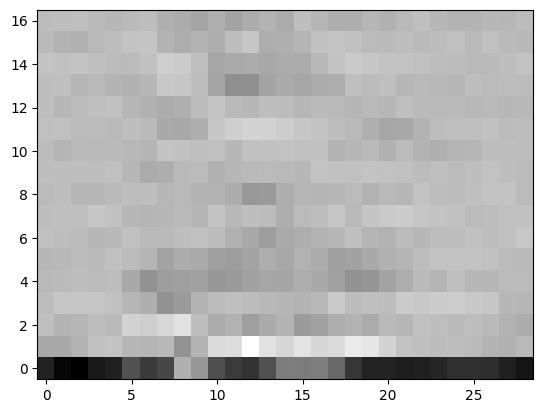

In [126]:
# Choose a random feature map to visualize
feature_map_idx = 0
image_belt = []
# Get the feature map tensor
feature_map = layer_output1[0, 46:, :, feature_map_idx].T
size = feature_map.shape[0]
plt.imshow(feature_map, cmap='gray' , origin='lower' , aspect='auto')
# for i in range(10):
#     image_belt[:, i * size : (i + 1) * size] = layer_output3[0, :, :, i].T

plt.show()

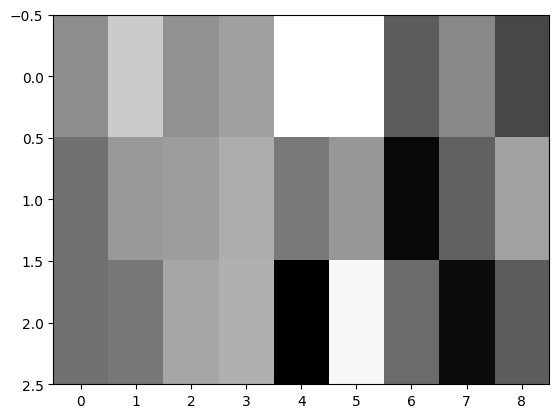

In [121]:
# Choose a random feature map to visualize
feature_map_idx = 0
image_belt = []
# Get the feature map tensor
feature_map = layer_output3[0, 9:, :, feature_map_idx].T
size = feature_map.shape[1]
plt.imshow(feature_map, cmap='gray'  , aspect='auto')
# for i in range(10):
#     image_belt[:, i * size : (i + 1) * size] = layer_output3[0, :, :, i].T

plt.show()

(154, 38, 64)
(154, 1)


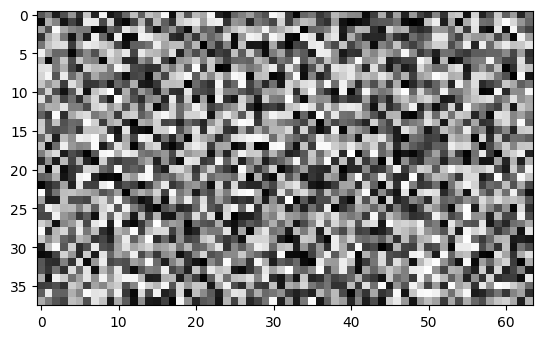

In [38]:
x = np.arange(154)  # shape (154,)
y = np.random.rand(154, 38, 64)  # shape (154, 38, 64)
print(y.shape)
# Reshape x to be a 2D array with shape (154, 1)
x = np.reshape(x, (154, 1))  # shape (154, 1)
print(x.shape)

# Plot the data
plt.imshow(y[0], cmap='gray')  # Plot the first slice of y
# plt.plot(x, color='red')  # Plot x as a red line
plt.show()

In [41]:
squeezed_output0.shape

(154, 38, 64)

TypeError: list indices must be integers or slices, not tuple

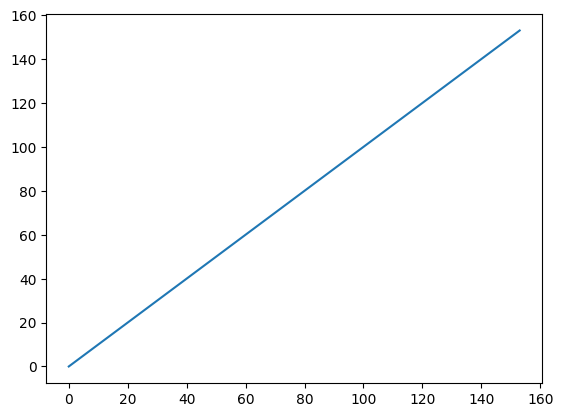

In [45]:
plt.plot(feature_image)
plt.show()

In [23]:
import librosa
def MFCCVisualize(signal):
  librosa.display.specshow(signal)
  plt.xlabel("Time")
  plt.ylabel("MFCC")
  plt.colorbar()
  plt.show()

ValueError: For X (155) and Y (2) with flat shading, A should have shape (1, 154, 3) or (1, 154, 4) or (1, 154) or (154,), not (374528,)

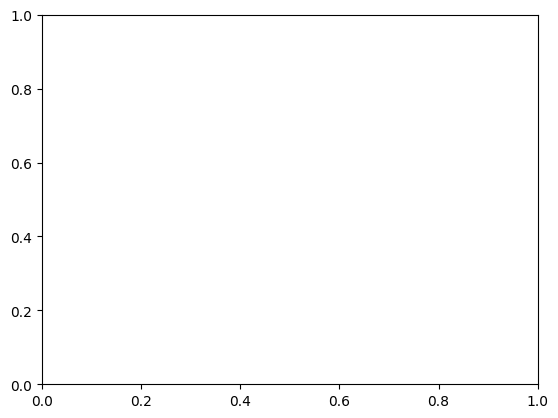

In [24]:
MFCCVisualize(layer_output0)

In [25]:
fig, axs = plt.subplots(nrows=layer_output0.shape[-1], figsize=(10, 10))
for i in range(layer_output0.shape[-1]):
    axs[i].imshow(layer_output0[0, :, :, i], cmap='gray')
    axs[i].axis('off')
plt.show()

In [188]:
def plot_to_graph(name, data):
    epochs = data['epoch']
    accuracy = data['accuracy']
    loss = data['loss']
    val_accuracy = data['val_accuracy']
    val_loss = data['val_loss']
    fig, ax = plt.subplots(figsize=(4, 2))
    ax.plot(epochs, accuracy, label='Training Accuracy')
    # ax.plot(epochs, val_accuracy, label='Validation Accuracy')
    ax.plot(epochs, loss, label='Training Loss')
    # ax.plot(epochs, val_loss, label='Validation Loss')

    # Add titles and labels
    ax.set_title('Accuracy of {}'.format(name))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy/Loss')
    ax.legend()
    plt.grid()
    plt.show()

def plot_all_accuracy(data, type='accuracy'):
    fix, ax = plt.subplots(figsize=(10,6))
    # for df in data:
    #     print(df["Name"])
        # ax.plot(df["epoch"], df["accuracy"], label=df["Name"])
    if type=='accuracy':
        for x,y in zip(data["Name"],data["Data"]):
            ax.plot(y["epoch"]+1, y["accuracy"], label=x)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Accuracy")
    elif type =='val_accuracy':
        for x,y in zip(data["Name"],data["Data"]):
            ax.plot(y["epoch"]+1, y["val_accuracy"], label=x)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Accuracy")
    elif type =='loss':
        for x,y in zip(data["Name"],data["Data"]):
            ax.plot(y["epoch"]+1, y["loss"], label=x)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
    elif type =='val_loss':
        for x,y in zip(data["Name"],data["Data"]):
            ax.plot(y["epoch"]+1, y["val_loss"], label=x)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
    # add a legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    # display the plot
    ax.set_xlim([0, 30])

    plt.grid(True)
    plt.show()

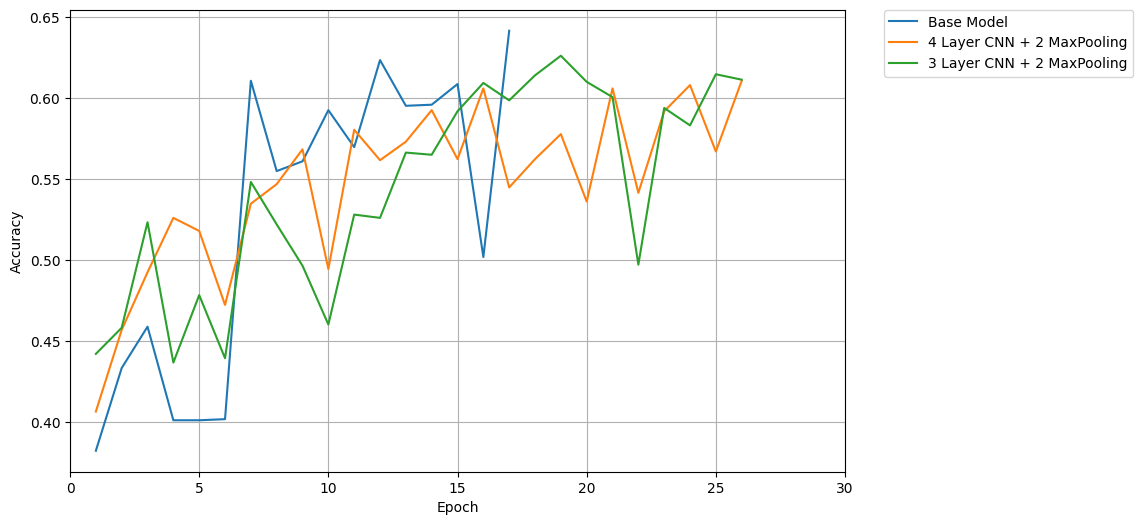

In [189]:
df_list = { "Name": [], "Data": []}
df_list["Name"].append("Base Model")
item_data = pd.read_csv("RobustCNNNormalDataH5adam_0001.csv")
df_list["Data"].append(item_data)

df_list["Name"].append("4 Layer CNN + 2 MaxPooling")
item_data = pd.read_csv("RobustCNN3LayerNormalDataH5adam_0001.csv")
df_list["Data"].append(item_data)

df_list["Name"].append("3 Layer CNN + 2 MaxPooling")
item_data = pd.read_csv("RobustCNN3secondLayerNormalDataH5adam_0001.csv")
df_list["Data"].append(item_data)

plot_all_accuracy(df_list, 'val_accuracy')

# "RobustCNN3LayerNormalDataH5adam_0001.csv"
# "RobustCNN3secondLayerNormalDataH5adam_0001.csv"
# "RobustCNNNormalDataH5adam_0001.csv"
# for x in os.listdir("robust_cnn_logs"):
#     df_list["Name"].append(x[:-4])
#     item_data = pd.read_csv("robust_cnn_logs/{}".format(x))
#     df_list["Data"].append(item_data)
#     print(x[:-4], item_data["val_accuracy"].max())

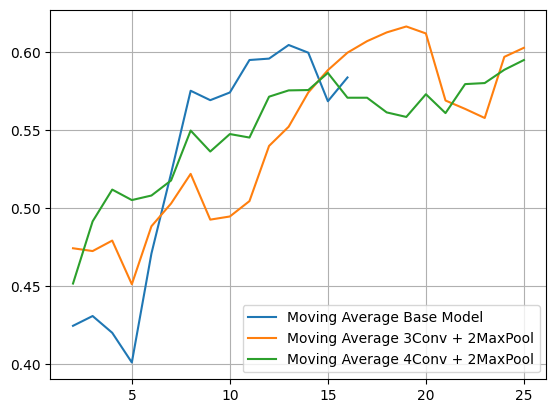

In [200]:
df0 = pd.read_csv("RobustCNNNormalDataH5adam_0001.csv")
df1 = pd.read_csv("RobustCNN3secondLayerNormalDataH5adam_0001.csv")
df2 = pd.read_csv("RobustCNN3LayerNormalDataH5adam_0001.csv")

# Calculate the rolling mean of validation accuracy column
window_size = 3
rolling_mean0 = df0['val_accuracy'].rolling(window_size).mean()
rolling_mean1 = df1['val_accuracy'].rolling(window_size).mean()
rolling_mean2 = df2['val_accuracy'].rolling(window_size).mean()


# Plot the line chart with original and trend line data
# plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy')
plt.plot(df0['epoch'], rolling_mean0, label=f'Moving Average Base Model')
plt.plot(df1['epoch'], rolling_mean1, label=f'Moving Average 3Conv + 2MaxPool')
plt.plot(df2['epoch'], rolling_mean2, label=f'Moving Average 4Conv + 2MaxPool')

plt.legend()
plt.grid()
plt.show()